In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample



pd.set_option('display.max_columns', 200)

# Loading Data
As there is a large amount of data in user_logs I will be limiting the number of rows in the loaded data 

In [2]:
train = pd.read_csv('./kkbox-churn-prediction-challenge/train.csv')
members = pd.read_csv('./kkbox-churn-prediction-challenge/members_V3.csv', nrows=10000000)
transactions = pd.read_csv('./kkbox-churn-prediction-challenge/transactions.csv', nrows=10000000)
user_logs = pd.read_csv('./kkbox-churn-prediction-challenge/user_logs.csv',nrows = 100000000)

#### Train Dataset

In [3]:
print(train.shape)
train.head()

(992931, 2)


,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 2 columns):
msno        992931 non-null object
is_churn    992931 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.2+ MB


0    0.936077
1    0.063923
Name: is_churn, dtype: float64


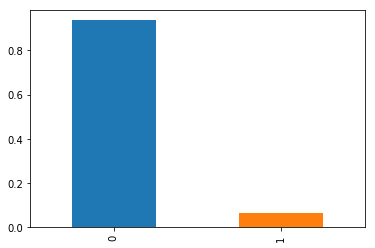

In [5]:
print(train.is_churn.value_counts(dropna=False,normalize=True))
train.is_churn.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [6]:
# low variance in churn data may have to resample

#### Member Dataset vs Train Data set

In [101]:
df_member= pd.merge(left = train,right = members,how = 'inner',on=['msno'])

In [102]:
print(df_member.shape)
df_member.head()

(877161, 7)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18,36,female,9,20050406
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10,38,male,9,20050407
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11,27,female,9,20051016
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,female,9,20051102
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3,27,male,9,20051228


In [103]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877161 entries, 0 to 877160
Data columns (total 7 columns):
msno                      877161 non-null object
is_churn                  877161 non-null int64
city                      877161 non-null int64
bd                        877161 non-null int64
gender                    391692 non-null object
registered_via            877161 non-null int64
registration_init_time    877161 non-null int64
dtypes: int64(5), object(2)
memory usage: 53.5+ MB


NaN       485469
male      206284
female    185408
Name: gender, dtype: int64
NaN       55.345484
male      23.517233
female    21.137283
Name: gender, dtype: float64


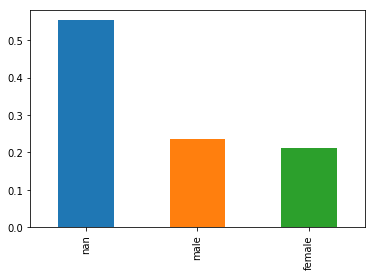

In [104]:
print(df_member.gender.value_counts(dropna=False))
print(df_member.gender.value_counts(dropna=False,normalize=True)*100)
df_member.gender.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [105]:
gender_churn = df_member[['gender', 'is_churn']]
gender_churn.groupby('gender')['is_churn'].value_counts(dropna=False,normalize=True)

gender  is_churn
female  0           0.913634
        1           0.086366
male    0           0.911554
        1           0.088446
Name: is_churn, dtype: float64

In [106]:
gender_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877161 entries, 0 to 877160
Data columns (total 2 columns):
gender      391692 non-null object
is_churn    877161 non-null int64
dtypes: int64(1), object(1)
memory usage: 20.1+ MB


In [107]:
gender_churn['gender'].unique()

array(['female', 'male', nan], dtype=object)

In [108]:
gender_churn = df_member[['gender', 'is_churn']]
gender_churn['gender']=gender_churn['gender'].fillna("other")


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
gender_churn.is_churn.value_counts(dropna=False,normalize=True)*100

0    93.42709
1     6.57291
Name: is_churn, dtype: float64

In [110]:
gender_churn2 = gender_churn.groupby('is_churn')['gender'].value_counts(dropna=False,normalize=True)
gender_churn2

is_churn  gender
0         other     0.563842
          male      0.229454
          female    0.206704
1         other     0.405810
          male      0.316451
          female    0.277738
Name: gender, dtype: float64

In [111]:
#gender_churn.plot.bar(stacked=True)

In [112]:
# 60% of column gender is missing. This column can be dropped

In [113]:
df_member.drop(['gender'], axis=1, inplace = True)

1     51.916239
13    11.204443
5      8.128382
4      5.465929
15     4.942764
22     4.802881
6      2.966616
14     2.299122
12     1.317204
9      1.089652
11     1.030142
18     0.894021
8      0.876692
10     0.744789
17     0.632267
21     0.602626
3      0.580167
7      0.303935
16     0.108988
20     0.077181
19     0.015961
Name: city, dtype: float64


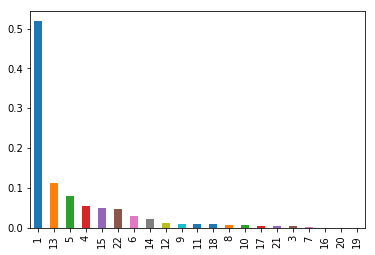

In [114]:
print(df_member.city.value_counts(dropna=False,normalize=True)*100)
df_member.city.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [115]:
  
def city_fixer(row):
    if row['city'] in [1,5,13,4,22,15] :
        return row['city']
    else:
        return 999
    


In [116]:
df_member['city']= df_member.apply (lambda row: city_fixer(row), axis=1)

1      51.916239
999    13.539362
13     11.204443
5       8.128382
4       5.465929
15      4.942764
22      4.802881
Name: city, dtype: float64


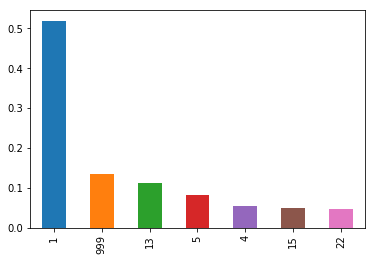

In [117]:
print(df_member.city.value_counts(dropna=False,normalize=True)*100)
df_member.city.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [118]:
cities_churn = df_member[['city', 'is_churn']]
cities_churn = cities_churn.groupby('city')['is_churn'].value_counts(dropna=False,normalize=True)
cities_churn

city  is_churn
1     0           0.951589
      1           0.048411
4     0           0.911065
      1           0.088935
5     0           0.912369
      1           0.087631
13    0           0.921267
      1           0.078733
15    0           0.915767
      1           0.084233
22    0           0.915759
      1           0.084241
999   0           0.914468
      1           0.085532
Name: is_churn, dtype: float64

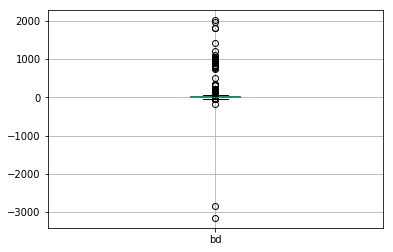

In [119]:
df_member.boxplot('bd')

In [120]:
def bd_fixer(row):
    if (row['bd'] > 0) & (row['bd'] <=100) :
        return row['bd']
    else:
        return 999

In [121]:
df_member['bd']= df_member.apply (lambda row: bd_fixer(row), axis=1)

In [122]:
df_member['bd'].shape

(877161,)

In [123]:
def bd_checker(row):
    if (row['bd'] > 0) & (row['bd'] <=100) :
        return 'good'
    else:
        return 'bad'

In [124]:
df_member['bd_checker']= df_member.apply (lambda row: bd_checker(row), axis=1)

In [125]:
df_member['bd_checker'].value_counts(dropna=False,normalize=True)*100


bad     55.636423
good    44.363577
Name: bd_checker, dtype: float64

In [126]:
bd_churn = df_member[['bd_checker', 'is_churn']]
bd_churn = bd_churn.groupby('bd_checker')['is_churn'].value_counts(dropna=False,normalize=True)
bd_churn

bd_checker  is_churn
bad         0           0.952377
            1           0.047623
good        0           0.911564
            1           0.088436
Name: is_churn, dtype: float64

In [127]:
# convert date column into date format
df_member['registration_init_time'] = pd.to_datetime(df_member['registration_init_time'], format='%Y%m%d')

In [128]:
# break date column in to parts for further analysis
df_member['registration_year'] = df_member.registration_init_time.dt.year
df_member['registration_month'] = df_member.registration_init_time.dt.month
df_member['registration_day'] = df_member.registration_init_time.dt.day
df_member['registration_weekday'] = df_member.registration_init_time.dt.weekday
df_member['registration_day_of_week'] = df_member.registration_init_time.dt.weekday_name


In [129]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877161 entries, 0 to 877160
Data columns (total 12 columns):
msno                        877161 non-null object
is_churn                    877161 non-null int64
city                        877161 non-null int64
bd                          877161 non-null int64
registered_via              877161 non-null int64
registration_init_time      877161 non-null datetime64[ns]
bd_checker                  877161 non-null object
registration_year           877161 non-null int64
registration_month          877161 non-null int64
registration_day            877161 non-null int64
registration_weekday        877161 non-null int64
registration_day_of_week    877161 non-null object
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 87.0+ MB


In [130]:
df_member.head()

,msno,is_churn,city,bd,registered_via,registration_init_time,bd_checker,registration_year,registration_month,registration_day,registration_weekday,registration_day_of_week
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,999,36,9,2005-04-06,good,2005,4,6,2,Wednesday
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,999,38,9,2005-04-07,good,2005,4,7,3,Thursday
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,999,27,9,2005-10-16,good,2005,10,16,6,Sunday
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,9,2005-11-02,good,2005,11,2,2,Wednesday
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,999,27,9,2005-12-28,good,2005,12,28,2,Wednesday


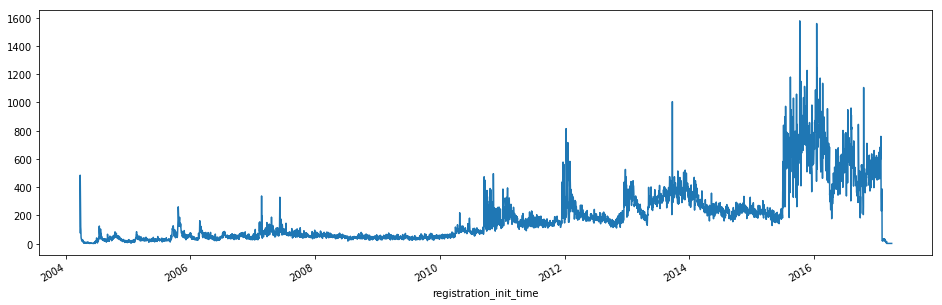

In [35]:
# graph count of members registration date over time
member_date = df_member.groupby('registration_init_time').registration_init_time.count()
ax = member_date.plot(figsize=(16, 5))


In [36]:
#fairly low numbers of registrations daily until around 2013 where member registration increases overall but
#erratically on a day to day basis

Saturday     16.182662
Friday       14.395077
Sunday       14.150196
Monday       13.930054
Tuesday      13.855609
Thursday     13.771018
Wednesday    13.715384
Name: registration_day_of_week, dtype: float64


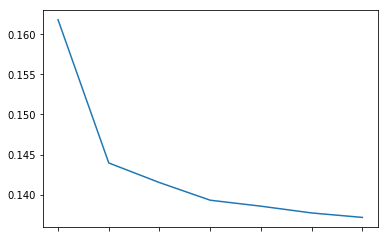

In [37]:
print(df_member.registration_day_of_week.value_counts(dropna=False,normalize=True)*100)
df_member.registration_day_of_week.value_counts(dropna=False,normalize=True).plot()

2016    23.586548
2015    18.469585
2013    13.345213
2014    10.451901
2012     8.810241
2011     7.225469
2010     4.549450
2007     3.004580
2006     2.074078
2008     2.020724
2017     1.902843
2009     1.801722
2005     1.796592
2004     0.961055
Name: registration_year, dtype: float64


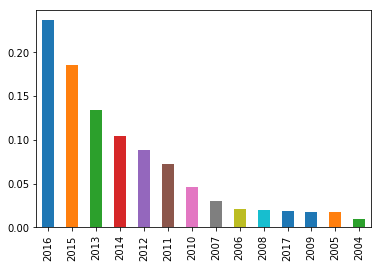

In [38]:
print(df_member.registration_year.value_counts(dropna=False,normalize=True)*100)
df_member.registration_year.value_counts(dropna=False,normalize=True).plot(kind='bar')

1     10.682988
12     9.645664
10     9.500536
11     9.280280
8      8.940662
7      8.720178
2      8.282516
9      8.020990
3      7.648083
6      6.909564
5      6.523774
4      5.844765
Name: registration_month, dtype: float64


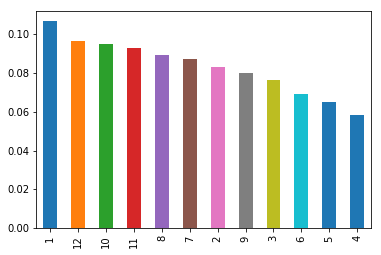

In [39]:
print(df_member.registration_month.value_counts(dropna=False,normalize=True)*100)
df_member.registration_month.value_counts(dropna=False,normalize=True).plot(kind='bar')

7     55.032770
9     26.975664
3     12.021168
4      5.618467
13     0.351931
Name: registered_via, dtype: float64


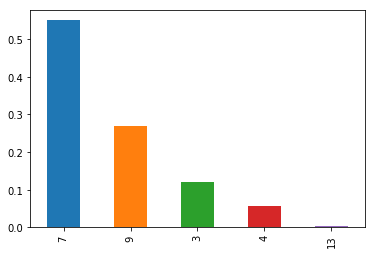

In [40]:
print(df_member.registered_via.value_counts(dropna=False,normalize=True)*100)
df_member.registered_via.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [41]:
reg_via_churn = df_member[['registered_via', 'is_churn']]
reg_via_churn = reg_via_churn.groupby('registered_via')['is_churn'].value_counts(dropna=False,normalize=True)
reg_via_churn

registered_via  is_churn
3               0           0.872910
                1           0.127090
4               0           0.817442
                1           0.182558
7               0           0.969840
                1           0.030160
9               0           0.913638
                1           0.086362
13              0           0.914804
                1           0.085196
Name: is_churn, dtype: float64

In [131]:
df_member.head()

,msno,is_churn,city,bd,registered_via,registration_init_time,bd_checker,registration_year,registration_month,registration_day,registration_weekday,registration_day_of_week
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,999,36,9,2005-04-06,good,2005,4,6,2,Wednesday
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,999,38,9,2005-04-07,good,2005,4,7,3,Thursday
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,999,27,9,2005-10-16,good,2005,10,16,6,Sunday
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,9,2005-11-02,good,2005,11,2,2,Wednesday
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,999,27,9,2005-12-28,good,2005,12,28,2,Wednesday


In [132]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877161 entries, 0 to 877160
Data columns (total 12 columns):
msno                        877161 non-null object
is_churn                    877161 non-null int64
city                        877161 non-null int64
bd                          877161 non-null int64
registered_via              877161 non-null int64
registration_init_time      877161 non-null datetime64[ns]
bd_checker                  877161 non-null object
registration_year           877161 non-null int64
registration_month          877161 non-null int64
registration_day            877161 non-null int64
registration_weekday        877161 non-null int64
registration_day_of_week    877161 non-null object
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 87.0+ MB


#### User Logs Data

In [151]:
df_log= pd.merge(left = train,right = user_logs,how = 'inner',on=['msno'])
print(df_log.shape)
df_log.head()

(62622030, 10)


,msno,is_churn,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170122,5,2,2,0,21,26,6178.814
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170124,0,0,0,0,8,8,2232.821
2,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170126,1,0,0,0,16,17,4474.698
3,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170127,0,0,1,1,29,31,7443.091
4,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170129,3,1,0,0,19,23,4817.478


In [152]:
print(df_log.shape)
df_log.head()

(62622030, 10)


,msno,is_churn,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170122,5,2,2,0,21,26,6178.814
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170124,0,0,0,0,8,8,2232.821
2,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170126,1,0,0,0,16,17,4474.698
3,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170127,0,0,1,1,29,31,7443.091
4,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,20170129,3,1,0,0,19,23,4817.478


In [153]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62622030 entries, 0 to 62622029
Data columns (total 10 columns):
msno          object
is_churn      int64
date          int64
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 5.1+ GB


In [154]:
df_log['date'] = pd.to_datetime(df_log['date'], format='%Y%m%d')
df_log['weekday']= df_log.date.dt.day_name()
df_log['day_of_week']= df_log.date.dt.weekday
df_log['year']= df_log.date.dt.year
df_log['month']= df_log.date.dt.month


In [155]:
df_log.head()

,msno,is_churn,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,weekday,day_of_week,year,month
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,2017-01-22,5,2,2,0,21,26,6178.814,Sunday,6,2017,1
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,2017-01-24,0,0,0,0,8,8,2232.821,Tuesday,1,2017,1
2,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,2017-01-26,1,0,0,0,16,17,4474.698,Thursday,3,2017,1
3,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,2017-01-27,0,0,1,1,29,31,7443.091,Friday,4,2017,1
4,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,2017-01-29,3,1,0,0,19,23,4817.478,Sunday,6,2017,1


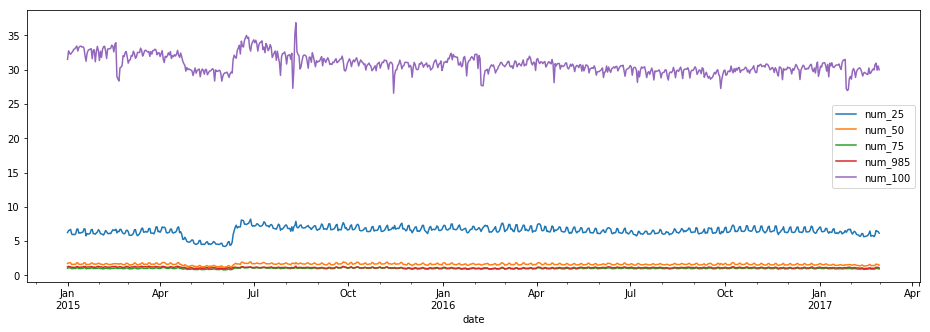

In [156]:
# graph overall song use by date
gr=df_log.groupby(pd.Grouper(key='date', freq='D')).mean()
gr.plot.line(y=['num_25','num_50','num_75','num_985','num_100'],figsize=(16, 5))

In [157]:
# majority of songs listened to entirely 
# spike in listening around jun/jul 2015 otherwise overall listeneing habits are steady

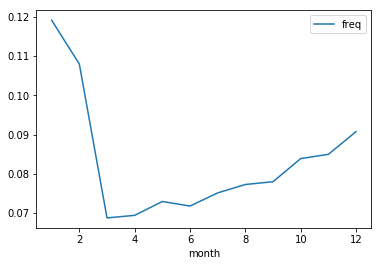

In [158]:
# graph overall song use by month
use_month = pd.DataFrame(df_log.month.value_counts(dropna=False, normalize=True)).reset_index()
use_month  = use_month.sort_values(by=['index'])
use_month.rename(columns={'index':'month', 'month':'freq'}).plot(x='month', y='freq')


In [159]:
# majority of songs listened to in  Jan/Feb, drops in midlle months of year and slowly increases towords end of year

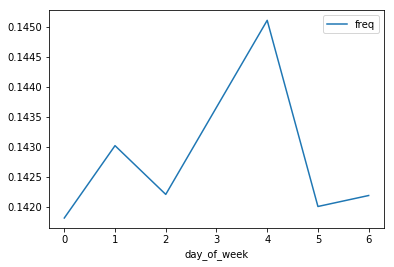

In [160]:
# graph overall song use by day
use_day = pd.DataFrame(df_log.day_of_week.value_counts(dropna=False, normalize=True)).reset_index()
use_day  = use_day.sort_values(by=['index'])
use_day.rename(columns={'index':'day_of_week', 'day_of_week':'freq'}).plot(x='day_of_week', y='freq')

In [161]:
# spike during end of week in listening drop on wednesday and saturdays

In [162]:
# song history
df_log['total_songs'] = df_log['num_25']+df_log['num_50']+df_log['num_75']+df_log['num_985']+df_log['num_100']
df_log['songs_repeated'] = df_log['total_songs'] - df_log['num_unq']


In [163]:
# calculate how many days member listened to songs
days = df_log.groupby('msno')['total_secs'].count().reset_index()
days.columns = ['msno', 'days_listened']
days.head()

,msno,days_listened
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,26
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,144
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,144
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,78
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,117


In [164]:
days.days_listened.value_counts()

13     48730
26     37199
39     32605
52     28436
65     25478
78     23613
91     21811
104    19980
12     19858
156    19848
117    18221
130    16771
143    15941
24     15171
169    14594
182    13469
36     12912
48     11499
195    10768
60     10173
72      9574
84      8726
96      8049
1       7275
108     7268
120     6851
132     6331
2       6327
144     5974
3       5836
       ...  
171     1092
175     1092
173     1088
177     1055
176     1044
179     1044
181     1002
183      967
187      916
189      913
185      904
184      889
188      870
186      848
190      844
191      819
193      710
194      679
197      534
196      533
198      528
199      487
200      475
202      426
201      414
203      402
205      367
204      352
206      324
207      301
Name: days_listened, Length: 208, dtype: int64

In [165]:
def listen_checker(row):
    if (row['days_listened'] > 0) & (row['days_listened'] < 20) :
        return '0-19'
    if (row['days_listened'] >= 20) & (row['days_listened'] < 40) :
        return '20-39'
    if (row['days_listened'] >= 40) & (row['days_listened'] < 60) :
        return '40-59'
    if (row['days_listened'] >= 60) & (row['days_listened'] < 80) :
        return '60-79'
    if (row['days_listened'] >= 80) & (row['days_listened'] < 100) :
        return '80-99'
    if (row['days_listened'] >= 100) & (row['days_listened'] < 120) :
        return '100-119'
    if (row['days_listened'] >= 120) & (row['days_listened'] < 140) :
        return '120-39'
    if (row['days_listened'] >= 140) & (row['days_listened'] < 160) :
        return '140-159'
    if (row['days_listened'] >= 160) & (row['days_listened'] < 180) :
        return '160-179'
    if (row['days_listened'] >= 180) & (row['days_listened'] < 200) :
        return '180-199'
    else:
        return '200+'

In [166]:
days['listen_checker']= days.apply (lambda row: listen_checker(row), axis=1)

In [167]:
print(days.listen_checker.value_counts(dropna=False,normalize=True)*100)
days_checker_churn = pd.merge(left = train,right = days,how = 'inner',on=['msno'])
days_checker_churn = days_checker_churn.groupby('listen_checker')['is_churn'].value_counts(dropna=False,normalize=True)
days_checker_churn




0-19       18.047404
20-39      17.666688
60-79      12.279793
40-59      10.015559
100-119     8.751305
80-99       8.332431
140-159     7.693103
120-39      6.448297
180-199     5.229341
160-179     4.937987
200+        0.598093
Name: listen_checker, dtype: float64


listen_checker  is_churn
0-19            0           0.916335
                1           0.083665
100-119         0           0.943134
                1           0.056866
120-39          0           0.945903
                1           0.054097
140-159         0           0.949984
                1           0.050016
160-179         0           0.955804
                1           0.044196
180-199         0           0.959396
                1           0.040604
20-39           0           0.926885
                1           0.073115
200+            0           0.967277
                1           0.032723
40-59           0           0.933303
                1           0.066697
60-79           0           0.934705
                1           0.065295
80-99           0           0.935356
                1           0.064644
Name: is_churn, dtype: float64

In [168]:
# drop date and merge data withrest of user log data
#df_log.drop(['date','day_of_week','year','month'], axis=1,inplace=True)
totals = df_log.groupby('msno').sum().reset_index()
logs = totals.merge(days, how='inner', on='msno')


In [169]:
logs.head()

,msno,is_churn,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,day_of_week,year,month,total_songs,songs_repeated,days_listened,listen_checker
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,154,69,69,146,572,657,187070.571,80,52429,169,1010,353,26,20-39
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,208,79,93,122,3022,3000,795861.753,438,290268,987,3524,524,144,140-159
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,1728,599,357,335,5890,6152,1670258.040,416,290229,839,8909,2757,144,140-159
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0,416,152,108,139,1272,1061,379522.215,249,157261,546,2087,1026,78,60-79
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0,260,175,69,76,1179,1616,337384.938,332,235833,673,1759,143,117,100-119


In [170]:
logs.shape

(812416, 16)

In [340]:
df_log = logs[['msno','num_unq','total_songs','songs_repeated']]
#song_checker= song_checker.groupby(['listen_checker'])


#### Transaction Data

In [64]:
df_transact= pd.merge(left = train,right = transactions,how = 'inner',on=['msno'])


In [65]:
print(df_transact.shape)
df_transact.head()

(7371253, 10)


,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,20161031,20161107,0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,20170107,20170206,0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20161031,20161221,0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160715,20160821,0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,20160831,20161021,0


In [66]:
df_transact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7371253 entries, 0 to 7371252
Data columns (total 10 columns):
msno                      object
is_churn                  int64
payment_method_id         int64
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             int64
transaction_date          int64
membership_expire_date    int64
is_cancel                 int64
dtypes: int64(9), object(1)
memory usage: 618.6+ MB


In [67]:
# convert date columns into date format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format='%Y%m%d')
transactions['membership_expire_date'] = pd.to_datetime(transactions['membership_expire_date'], format='%Y%m%d')

In [68]:
# Are there any differences between plan price and paid price? 
transactions['discount'] = transactions['plan_list_price'] - transactions['actual_amount_paid']
transactions['discount'].unique()

array([    0,   149,  -149,    30,  -119,  -150,  -129,  -536,  -894,
       -1788,  -134,    20,  -799,   120,   180,   -35,    50, -1599,
        -100,  -131,  -300,  -480,  -450,    -1, -1000,  -105,     1,
        -447, -1200,  -930,   -30,   -50,   699,   -11,  -350,  -500,
           4,  -400,   -41,   -14, -2000,   -95])

In [69]:
# Are there any differences between plan price and paid price? 
def discounter_cal(row):
    if row['plan_list_price'] == 0 :
        return 0
    if row['actual_amount_paid'] == 0 :
        return 0
    else:
        return row['plan_list_price']-row['actual_amount_paid']


In [70]:
transactions['price_diff']= transactions.apply (lambda row: discounter_cal(row), axis=1)

In [71]:
transactions['price_diff'].unique()

array([  0,  30,  20,  50,  -1,   1, -30, -11,   4, -14, -95])

In [72]:
# 0 = price same, 1 = discount, 2 = paying more than price list
def is_discount(row):
    if row['price_diff'] == 0 :
        return 0
    if row['price_diff'] > 0 :
        return 1
    else:
        return 2


In [73]:
# identify discounted membrships
transactions['discount'] = transactions.apply (lambda row: is_discount(row), axis=1)

In [74]:
# discounted memberships proportions 
transactions.discount.value_counts(dropna=False,normalize=True)

0    0.985956
1    0.014038
2    0.000006
Name: discount, dtype: float64

In [75]:
# discount = 2 is so small these members could potentially be dropped most likely erros in the data,
#wait and see for now


In [76]:
# get latest transaction
max_transact = transactions.loc[transactions.groupby(['msno'])["transaction_date"].idxmax()]
max_transact.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,price_diff
6797850,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7,0,0,0,2016-09-09,2016-09-14,0,0,0
1521480,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,0,2015-11-21,2017-01-04,0,0,0
1914756,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-02-15,2017-03-15,0,0,0
5340639,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2016-11-30,2017-01-19,0,0,0
8526712,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,1,2017-01-26,2017-02-26,0,0,0


In [77]:
# checking max transact is there 
check_max = pd.DataFrame(max_transact.msno.value_counts())
check_max['msno'].unique()

array([1])

In [78]:
print(max_transact.shape)
max_transact.head()

(1913666, 11)


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,price_diff
6797850,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7,0,0,0,2016-09-09,2016-09-14,0,0,0
1521480,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,0,2015-11-21,2017-01-04,0,0,0
1914756,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-02-15,2017-03-15,0,0,0
5340639,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2016-11-30,2017-01-19,0,0,0
8526712,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,1,2017-01-26,2017-02-26,0,0,0


In [79]:
max_transact.discount.value_counts(dropna=False,normalize=True)


0    0.998956
1    0.001034
2    0.000010
Name: discount, dtype: float64

In [80]:
max_transact=max_transact[max_transact.discount != 2]

0    86.560322
1    13.439678
Name: is_cancel, dtype: float64


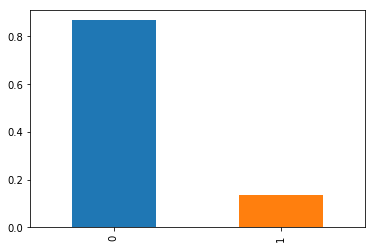

In [81]:
# is_cancel comparison
print(max_transact.is_cancel.value_counts(dropna=False,normalize=True)*100)
max_transact.is_cancel.value_counts(dropna=False,normalize=True).plot(kind='bar')


In [82]:
max_transact.shape

(1913647, 11)

# EDA After Merge

In [134]:

df_member.head()

,msno,is_churn,city,bd,registered_via,registration_init_time,bd_checker,registration_year,registration_month,registration_day,registration_weekday,registration_day_of_week
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,999,36,9,2005-04-06,good,2005,4,6,2,Wednesday
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,999,38,9,2005-04-07,good,2005,4,7,3,Thursday
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,999,27,9,2005-10-16,good,2005,10,16,6,Sunday
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,9,2005-11-02,good,2005,11,2,2,Wednesday
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,999,27,9,2005-12-28,good,2005,12,28,2,Wednesday


In [135]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877161 entries, 0 to 877160
Data columns (total 12 columns):
msno                        877161 non-null object
is_churn                    877161 non-null int64
city                        877161 non-null int64
bd                          877161 non-null int64
registered_via              877161 non-null int64
registration_init_time      877161 non-null datetime64[ns]
bd_checker                  877161 non-null object
registration_year           877161 non-null int64
registration_month          877161 non-null int64
registration_day            877161 non-null int64
registration_weekday        877161 non-null int64
registration_day_of_week    877161 non-null object
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 87.0+ MB


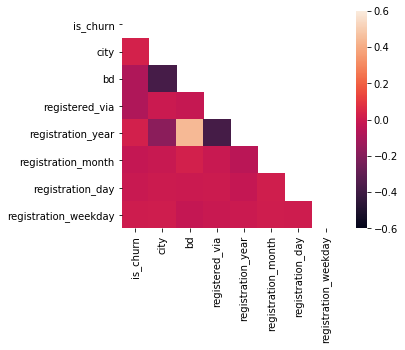

In [136]:
corr = df_member.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=-.6,vmax=.6, square=True)

In [137]:
#no strong correllations to is_churn

In [185]:
print(max_transact.shape)
max_transact.head()

(1913647, 11)


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,price_diff
6797850,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7,0,0,0,2016-09-09,2016-09-14,0,0,0
1521480,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,0,2015-11-21,2017-01-04,0,0,0
1914756,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-02-15,2017-03-15,0,0,0
5340639,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2016-11-30,2017-01-19,0,0,0
8526712,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,1,2017-01-26,2017-02-26,0,0,0


In [186]:
max_transact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913647 entries, 6797850 to 9570304
Data columns (total 11 columns):
msno                      object
payment_method_id         int64
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             int64
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                 int64
discount                  int64
price_diff                int64
dtypes: datetime64[ns](2), int64(8), object(1)
memory usage: 175.2+ MB


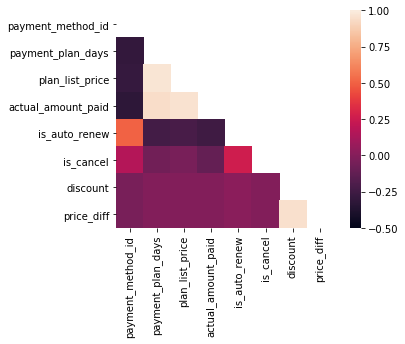

In [187]:
corr = max_transact.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=-.5,vmax=1, square=True)

In [90]:
# strong negative correlation between is churn and is_auto_renew
# somewhat of a correlation between is churn and is cancel

In [176]:
print(df_log.shape)
df_log.head()

(812416, 5)


,msno,num_unq,total_songs,songs_repeated,is_churn
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,657,1010,353,0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,3000,3524,524,0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,6152,8909,2757,0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,1061,2087,1026,0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,1616,1759,143,0


In [177]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812416 entries, 0 to 812415
Data columns (total 5 columns):
msno              812416 non-null object
num_unq           812416 non-null int64
total_songs       812416 non-null int64
songs_repeated    812416 non-null int64
is_churn          812416 non-null int64
dtypes: int64(4), object(1)
memory usage: 37.2+ MB


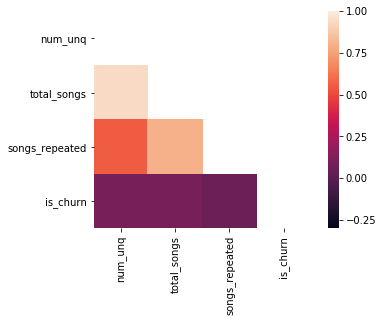

In [178]:
corr = df_log.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=-.3,vmax=1, square=True)

In [145]:
# is_churn is not correltated with all log data

## Merge all Data

In [524]:
# merge all
df= pd.merge(left = df_member,right = max_transact,how = 'inner',on=['msno'])
print(df.shape)
df.head()

df= pd.merge(left = df,right = df_log,how = 'inner',on=['msno'])
print(df.shape)
df.head()


(853426, 22)
(793311, 25)


,msno,is_churn,city,bd,registered_via,registration_init_time,bd_checker,registration_year,registration_month,registration_day,registration_weekday,registration_day_of_week,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,price_diff,num_unq,total_songs,songs_repeated
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,999,36,9,2005-04-06,good,2005,4,6,2,Wednesday,38,30,149,149,0,2017-01-07,2017-02-06,0,0,0,173,188,15
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,999,38,9,2005-04-07,good,2005,4,7,3,Thursday,39,30,149,149,1,2017-02-24,2017-03-21,1,0,0,1923,2814,891
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,999,27,9,2005-10-16,good,2005,10,16,6,Sunday,39,30,149,149,1,2017-01-12,2017-02-03,1,0,0,2824,3280,456
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,9,2005-11-02,good,2005,11,2,2,Wednesday,38,410,1788,1788,0,2016-01-06,2017-02-20,0,0,0,5380,9266,3886
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,999,27,9,2005-12-28,good,2005,12,28,2,Wednesday,38,30,149,149,0,2016-11-29,2016-12-29,0,0,0,19379,19920,541


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793311 entries, 0 to 793310
Data columns (total 25 columns):
msno                        793311 non-null object
is_churn                    793311 non-null int64
city                        793311 non-null int64
bd                          793311 non-null int64
registered_via              793311 non-null int64
registration_init_time      793311 non-null datetime64[ns]
bd_checker                  793311 non-null object
registration_year           793311 non-null int64
registration_month          793311 non-null int64
registration_day            793311 non-null int64
registration_weekday        793311 non-null int64
registration_day_of_week    793311 non-null object
payment_method_id           793311 non-null int64
payment_plan_days           793311 non-null int64
plan_list_price             793311 non-null int64
actual_amount_paid          793311 non-null int64
is_auto_renew               793311 non-null int64
transaction_date           

In [526]:
df['membership_length'] = df['membership_expire_date']-df['registration_init_time']
df['membership_length'] = round(df['membership_length'].dt.days/365.25,2)
df.head()

,msno,is_churn,city,bd,registered_via,registration_init_time,bd_checker,registration_year,registration_month,registration_day,registration_weekday,registration_day_of_week,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,price_diff,num_unq,total_songs,songs_repeated,membership_length
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,999,36,9,2005-04-06,good,2005,4,6,2,Wednesday,38,30,149,149,0,2017-01-07,2017-02-06,0,0,0,173,188,15,11.84
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,999,38,9,2005-04-07,good,2005,4,7,3,Thursday,39,30,149,149,1,2017-02-24,2017-03-21,1,0,0,1923,2814,891,11.95
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,999,27,9,2005-10-16,good,2005,10,16,6,Sunday,39,30,149,149,1,2017-01-12,2017-02-03,1,0,0,2824,3280,456,11.30
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13,23,9,2005-11-02,good,2005,11,2,2,Wednesday,38,410,1788,1788,0,2016-01-06,2017-02-20,0,0,0,5380,9266,3886,11.30
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,999,27,9,2005-12-28,good,2005,12,28,2,Wednesday,38,30,149,149,0,2016-11-29,2016-12-29,0,0,0,19379,19920,541,11.00


0    746140
1     47171
Name: is_churn, dtype: int64

percentage
0    94.053908
1     5.946092
Name: is_churn, dtype: float64



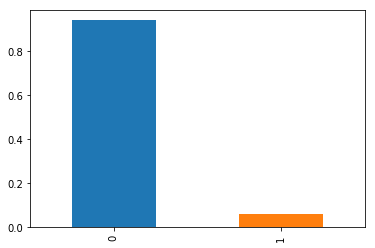

In [527]:
# recheck churn variance
print(df.is_churn.value_counts(dropna=False))
print()
print('percentage')
print(df.is_churn.value_counts(dropna=False,normalize=True)*100)
print()
df.is_churn.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [528]:
# still low variance in churn data will have to resample

In [529]:
cheker = df[df['membership_length']<0]
print(cheker.shape)
cheker.head()

(36, 26)


,msno,is_churn,city,bd,registered_via,registration_init_time,bd_checker,registration_year,registration_month,registration_day,registration_weekday,registration_day_of_week,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,price_diff,num_unq,total_songs,songs_repeated,membership_length
2672,yPst/g3QjR9SnJAd9neezOvLsCkSy77uS9SzYbdmiH0=,1,999,20,9,2009-04-15,good,2009,4,15,2,Wednesday,17,240,0,0,0,2017-01-28,1970-01-01,0,0,0,606,703,97,-39.29
5984,bJBEuEmV3fK5KVqPcwhZA312LmPafJRKnGWDK0HjBJs=,1,13,21,9,2007-12-15,good,2007,12,15,5,Saturday,17,120,0,0,0,2017-01-23,1970-01-01,0,0,0,7674,8374,700,-37.95
7559,6OpDsHnKIIMD8bgZqJR/k51Mh7nTMDf7Ex6mD3sBv9o=,1,1,22,7,2016-02-07,good,2016,2,7,6,Sunday,17,240,0,0,0,2017-01-26,1970-01-01,0,0,0,1362,1483,121,-46.10
9342,HtFCE7e2FqV7TT6FVLDK+QS6mMPYxotIES8YLlzAKWM=,1,1,19,9,2016-07-18,good,2016,7,18,0,Monday,17,120,0,0,0,2017-02-02,1970-01-01,0,0,0,1343,1987,644,-46.54
12965,+NTqmvxq7rww7DC6EzVx9yE1zxs+rCoXHS1LxgxPFxU=,1,1,999,4,2017-01-08,bad,2017,1,8,6,Sunday,29,30,180,180,1,2017-02-10,1970-01-01,1,0,0,58,100,42,-47.02


In [530]:
cheker['membership_expire_date'].unique()

array(['1970-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [531]:
# corrupted data in membership_expire_date column affects 87 rows
#dropping corrupted data
df = df[df['membership_length']>0]
print(df.shape)
print(df.is_churn.value_counts(dropna=False, normalize=True))

(793203, 26)
0    0.940555
1    0.059445
Name: is_churn, dtype: float64


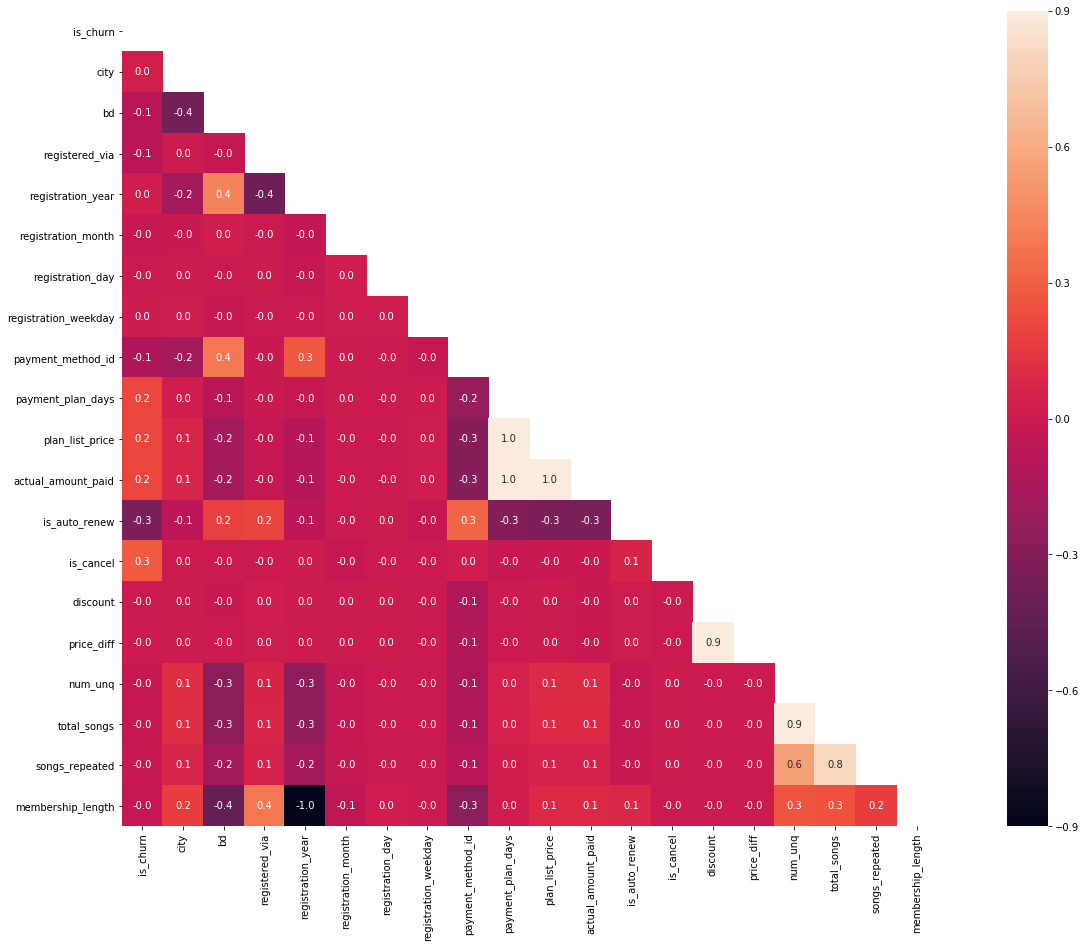

In [532]:
# correlation heatmap of final data
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (25,15))
sns.heatmap(corr, mask=mask, vmin=-.9,vmax=.9, square=True,annot=True, fmt=".1f")

In [533]:
# remove non correlated columns
df.drop(['price_diff', 'discount', 'plan_list_price', 'registration_weekday','registration_year','registration_month',
         'registration_day','bd_checker', 'registration_day_of_week', 'bd'], axis=1, inplace=True)

In [534]:
# churn has a correlation with is_auto_renew as suspected
# summarised user logs have no correlation with churn

In [535]:
# send data to csv
df.to_csv('./all_Data.csv')

In [536]:
df.is_churn.value_counts(normalize=True)

0    0.940555
1    0.059445
Name: is_churn, dtype: float64